In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/rober/Downloads/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\rober\AppData\Local\Temp\ipykernel_31732\3587418103.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_count = pd.value_counts(data['Class'], sort = True).sort_index()


Text(0, 0.5, 'Frequency')

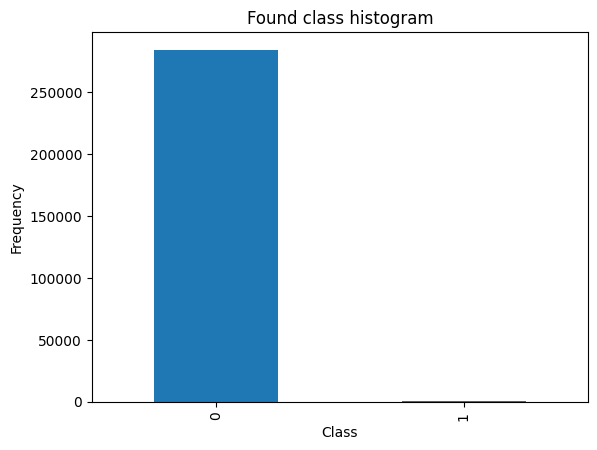

In [3]:
# counting how many entire there are for each class: 0,1
class_count = pd.value_counts(data['Class'], sort = True).sort_index()
# visualzing the counts of class with a histogram
class_count.plot(kind = 'bar')
plt.title("Found class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [4]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
#The distribution of sample is not even, there are way too much non fraudulent data than fraudulent ones
#calculate how many observation there are in class = 1
number_records_fraud = len(data[data.Class == 1])
#calculate how many observation there are in class = 0, and store the corresponding rows into a variable 'fraud_indices'
fraud_indices = np.array(data[data.Class == 1].index)
# store the corresponding rows of class =1 in another vector 'normal_indices'
normal_indices = data[data.Class == 0].index
#randomly select the same number of samples from class = 0 as class 1
random_normal_indices = np.array(np.random.choice(normal_indices, number_records_fraud, replace = False))
#concaenate the same number of rows of class = 1 and class = 0
resample_data = np.concatenate([fraud_indices,random_normal_indices])
#Convert the resample_data into a dataframe from an array
resample_df = data.iloc[resample_data]
# separate a DataFrame, data, into two parts:
# X (features):The variable X is assigned the subset of the DataFrame data that includes all columns except the one named 'Class'. This is achieved using the boolean condition data.columns != 'Class'.
# y (target variable):The variable y is assigned the subset of the DataFrame data that includes only the column named 'Class'.
X_resample = resample_df.loc[:, resample_df.columns != 'Class']
y_resample = resample_df.loc[:, resample_df.columns == 'Class']
#print of the percentage of normal, fradulent and total resampled observations
percentage_normal = len(resample_df[resample_df['Class'] == 0]) / len(resample_df)
percentage_fraud = len(resample_df[resample_df['Class'] == 1]) / len(resample_df)
total_num_resampled = len(resample_df)
print(percentage_normal)
print(percentage_fraud)
print(total_num_resampled)


0.5
0.5
984


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [6]:
from sklearn.model_selection import train_test_split
#Loading number of transactons in train and test dataset for the entire dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
print("Number transactions in the entire train dataset: ", len(X_train))
print("Number transactions in the entire test dataset: ", len(X_test))
print("Total number of transactions in the entire dataset: ", len(X_train)+len(X_test))

#Loading number of transaction in train and test dataset for the undersampled dataset 
X_train_resample,X_test_resample,y_train_resample,y_test_resample = train_test_split(X_resample,y_resample,test_size = 0.3,random_state = 0)
print("")
print("Number transactions in the resampled train dataset: ", len(X_train_resample))
print("Number transactions in the resampled test dataset: ", len(X_test_resample))
print("Total number of transactions in the resampled dataset: ", len(X_train_resample)+len(X_test_resample))

Number transactions in the entire train dataset:  199364
Number transactions in the entire test dataset:  85443
Total number of transactions in the entire dataset:  284807

Number transactions in the resampled train dataset:  688
Number transactions in the resampled test dataset:  296
Total number of transactions in the resampled dataset:  984


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report
def printing_Kfold_scores(x_train_data,y_train_data):
    #kfold by default = 5
    fold = KFold(n_splits=5,shuffle=False)
    #To determine the best C parameter, we would have to construct a model using the validation set
    c_param_range = [0.01,0.1,1,10,100]
    #creating empty dataframe
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')
        recall_accs = []
       
        for iteration,indices in enumerate(fold.split(x_train_data)):
            lr = LogisticRegression(C = c_param,penalty = 'l1',solver='liblinear')
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_resample = lr.predict(x_train_data.iloc[indices[1],:].values)
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_resample)
            recall_accs .append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)
        
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
    best_c = results_table.loc[results_table['Mean recall score'].values.argmax()]['C_parameter']
    
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    return best_c

best_c = printing_Kfold_scores(X_train_resample,y_train_resample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.8082191780821918
Iteration  1 : recall score =  0.821917808219178
Iteration  2 : recall score =  0.8983050847457628
Iteration  3 : recall score =  0.8918918918918919
Iteration  4 : recall score =  0.8939393939393939

Mean recall score  0.8628546713756837

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.8493150684931506
Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.9661016949152542
Iteration  3 : recall score =  0.918918918918919
Iteration  4 : recall score =  0.9090909090909091

Mean recall score  0.9012880580096739

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  0 : recall score =  0.8493150684931506
Iteration  1 : recall score =  0.8904109589041096
Ite

c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\

Iteration  4 : recall score =  0.9090909090909091

Mean recall score  0.9155627459783485

-------------------------------------------
C parameter:  100
-------------------------------------------

Iteration  0 : recall score =  0.863013698630137
Iteration  1 : recall score =  0.8904109589041096
Iteration  2 : recall score =  0.9830508474576272
Iteration  3 : recall score =  0.9459459459459459
Iteration  4 : recall score =  0.9090909090909091

Mean recall score  0.9183024720057457

*********************************************************************************
Best model to choose from cross validation is with C parameter =  100.0
*********************************************************************************


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rober\anaconda3\

In [9]:
#Defining the confusion maxtrix, which is performance measurement for machine learning classification problem 
# where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9251700680272109


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


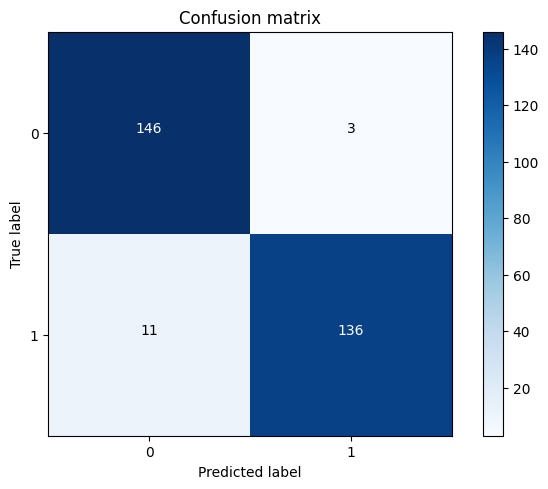

In [10]:
#Using the values from the undersampled train and test dataset, construct a confusion matrix to test if the model with best 
# c parameter is good for this problem. 
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_resample,y_train_resample.values.ravel())
y_pred_resample = lr.predict(X_test_resample.values)
cnf_matrix = confusion_matrix(y_test_resample,y_pred_resample)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()


Recall metric in the testing dataset:  0.9387755102040817


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


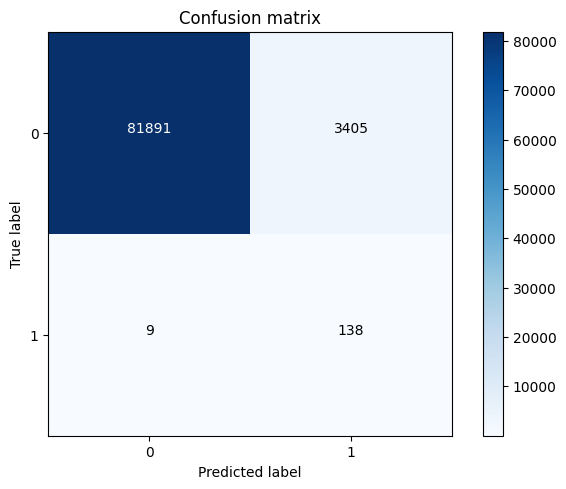

In [11]:
#Using the values from the resampled train and test dataset, construct a confusion matrix to test if the model with best 
# c parameter is good for this problem. 
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_resample,y_train_resample.values.ravel())
y_pred = lr.predict(X_test.values)
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [59]:
#There are 2773 observations that are not fraudulent but were detetected as fradulent in the prediction using this model
# Therefore, should consider using the original train and test dataset 
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------



c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  0 : recall score =  0.47761194029850745


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  1 : recall score =  0.5616438356164384


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  2 : recall score =  0.6333333333333333


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  3 : recall score =  0.5692307692307692


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  4 : recall score =  0.425

Mean recall score  0.5333639756958096

-------------------------------------------
C parameter:  0.1
-------------------------------------------



c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  0 : recall score =  0.582089552238806


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  1 : recall score =  0.6438356164383562


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  2 : recall score =  0.6833333333333333


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  3 : recall score =  0.5846153846153846


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  4 : recall score =  0.5125

Mean recall score  0.6012747773251761

-------------------------------------------
C parameter:  1
-------------------------------------------



c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  0 : recall score =  0.5671641791044776


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  1 : recall score =  0.6301369863013698


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  2 : recall score =  0.7333333333333333


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  3 : recall score =  0.6153846153846154


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  4 : recall score =  0.5625

Mean recall score  0.6217038228247592

-------------------------------------------
C parameter:  10
-------------------------------------------



c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  0 : recall score =  0.5522388059701493


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  1 : recall score =  0.6301369863013698


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  2 : recall score =  0.7333333333333333


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  3 : recall score =  0.6153846153846154


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  4 : recall score =  0.5625

Mean recall score  0.6187187481978935

-------------------------------------------
C parameter:  100
-------------------------------------------



c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  0 : recall score =  0.5522388059701493


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  1 : recall score =  0.6301369863013698


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  2 : recall score =  0.7333333333333333


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration  3 : recall score =  0.6153846153846154
Iteration  4 : recall score =  0.5625

Mean recall score  0.6187187481978935

*********************************************************************************
Best model to choose from cross validation is with C parameter =  1.0
*********************************************************************************


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Recall metric in the testing dataset:  0.6190476190476191


c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


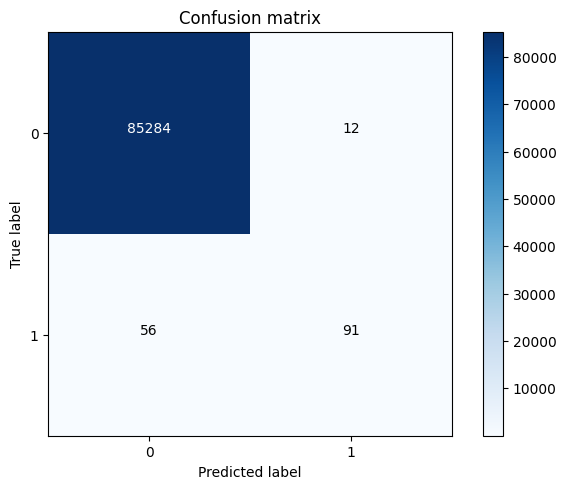

In [60]:
# Constructing a confusion matrix to see if using the best_c derived from the original train and test dataset would result in more accuracy
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

c:\Users\rober\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Recall metric in the testing dataset:  0.9659863945578231
Recall metric in the testing dataset:  0.9455782312925171
Recall metric in the testing dataset:  0.9319727891156463
Recall metric in the testing dataset:  0.9319727891156463
Recall metric in the testing dataset:  0.9319727891156463
Recall metric in the testing dataset:  0.9183673469387755
Recall metric in the testing dataset:  0.9115646258503401
Recall metric in the testing dataset:  0.891156462585034
Recall metric in the testing dataset:  0.8571428571428571


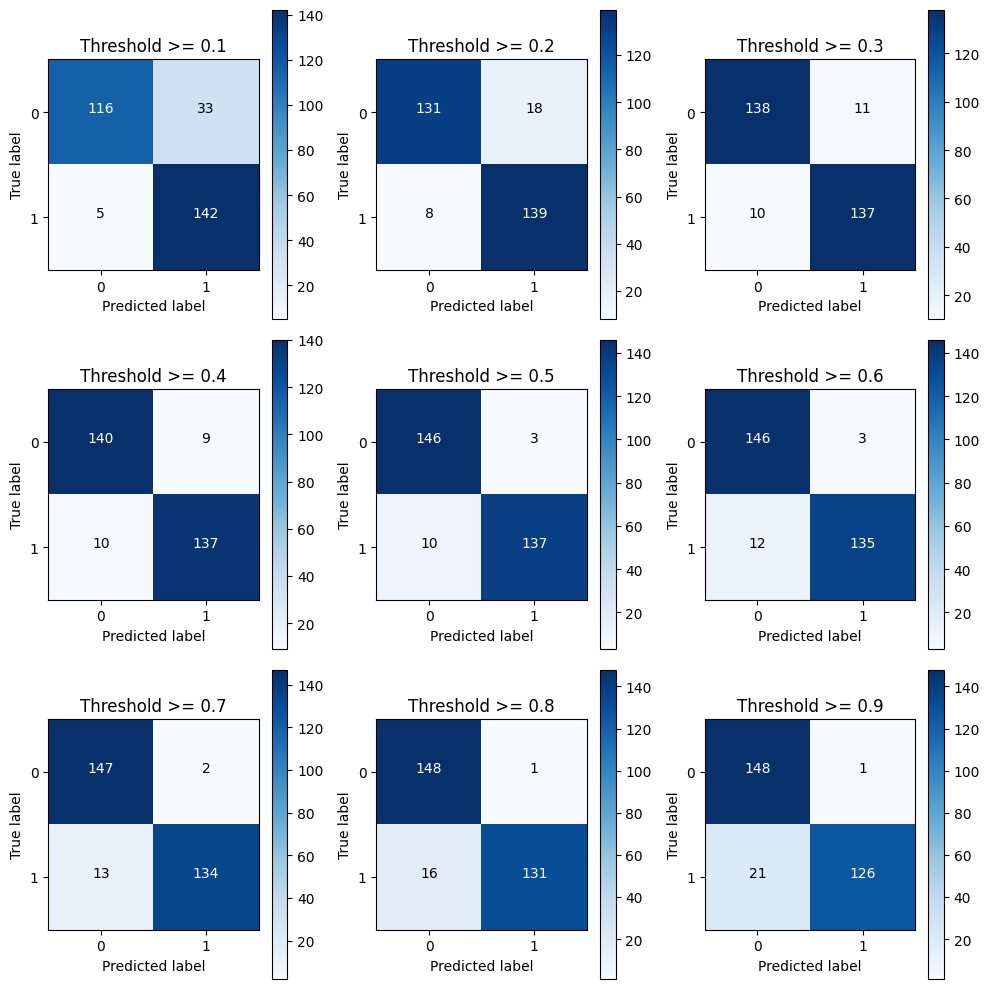

In [61]:
#Because the above graph shows that using the best_c derived from the original dataset cannot detect as much fraudulent cases
# and that the recall value is lower compared to the previous model, we want to see how the model behaves by setting a threshold.
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_resample,y_train_resample.values.ravel())
y_pred_resample_proba = lr.predict_proba(X_test_resample.values)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(10,10))
j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_resample_proba[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    cnf_matrix = confusion_matrix(y_test_resample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix,classes=class_names,title='Threshold >= %s'%i)

In [ ]:
#From the above graph, one can conclude that when the threshold is small, the model does a good job in classifying fraudulent cases
# while a bigger threshold lets the model predict non-fraudulent cases.
#When threshold is small, accuracy is small and recall is high. When threshold is large, accuracy is larger, but recall is small.